# Shafiqul Alam Khan

# EE 5323 Digital Image Processing

# Homework #5

# Due date: 3/10/2023

3. Same requirements from question '#1' but with a Laplacian filter saves the output image as "lena_laplacian.png".

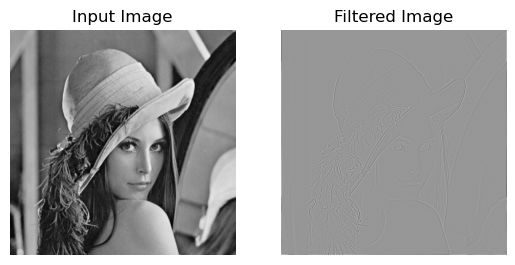

True

In [1]:
# Importing libreries
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Reading lena image
img = cv2.imread('lena_gray.jpg',0)

# Normalize the image
img_norm = img/255

# Fourier Transform
img_f = np.fft.fft2(img_norm)

# Fourier Transform Shift
img_f_shift = np.fft.fftshift(img_f)

# Getting image dimentions
h,w = img_f_shift.shape

# Creating laplacian mask
L = np.zeros((h,w), dtype = np.float32)
for u in range(h):
    for v in range(w):
        L[u,v] = -4*np.pi*np.pi*((u-h/2)**2 + (v-w/2)**2)

# Applying mask to the image
img_back = img_f_shift*L

# Inverse Fourier Transform Shift
img_inv_f_shift = np.fft.ifftshift(img_back)

# Inverse Fourier Transform
img_inv_f = np.fft.ifft2(img_inv_f_shift)

# Getting real number
img_real = np.real(img_inv_f)

# Normalizing the output image
img_output = cv2.normalize(img_real, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)

# Showing the filtered image
plt.subplot(121),plt.imshow(img, 'gray')
plt.title('Input Image')
plt.axis('off')
plt.subplot(122),plt.imshow(img_output, 'gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()

# Saving the output image
cv2.imwrite('lena_laplacian.png', img_output)